In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np

In [2]:
df = pd.read_csv("50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df=df.rename({'Marketing Spend':'Marketing_Spend'},axis=1)
df=df.rename({'R&D Spend':'RandD_Spend'},axis=1)

In [5]:
df.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA

In [6]:
df.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.shape

(50, 5)

In [8]:
df.isnull().sum()

RandD_Spend        0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [9]:
df.describe()

,RandD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RandD_Spend      50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<AxesSubplot:>

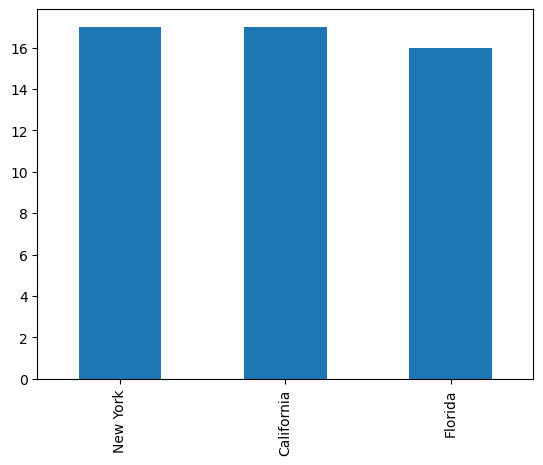

In [11]:
df['State'].value_counts().plot.bar()

#### lets drop state column

In [12]:
df = df.drop("State", axis=1)

In [13]:
df.head()

,RandD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [14]:
corr = df.corr()

In [15]:
corr

,RandD_Spend,Administration,Marketing_Spend,Profit
RandD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

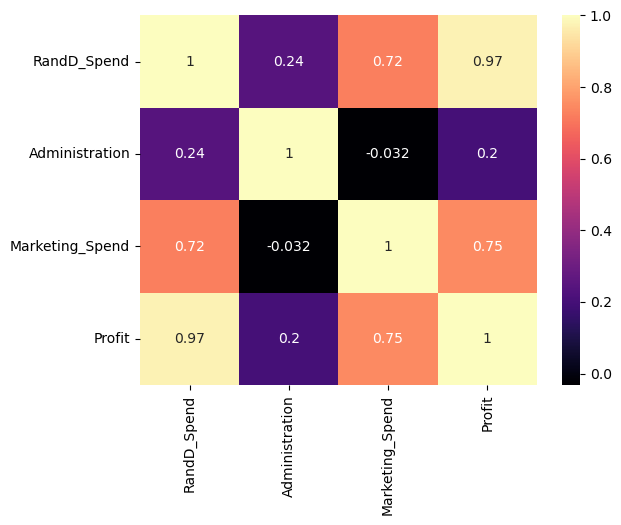

In [16]:
sns.heatmap(corr, cmap="magma", annot=True)

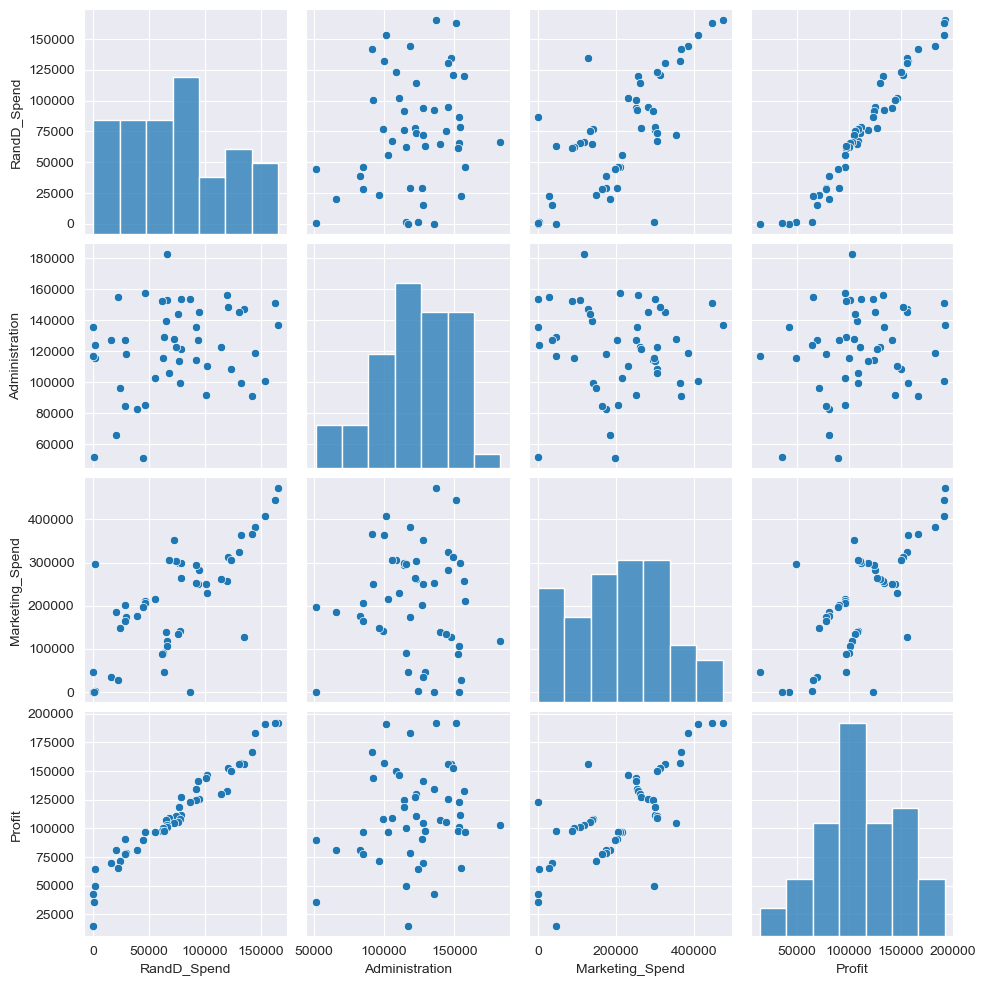

In [17]:
sns.set_style(style='darkgrid')  #Pair plot
sns.pairplot(df)

<AxesSubplot:xlabel='Profit', ylabel='Marketing_Spend'>

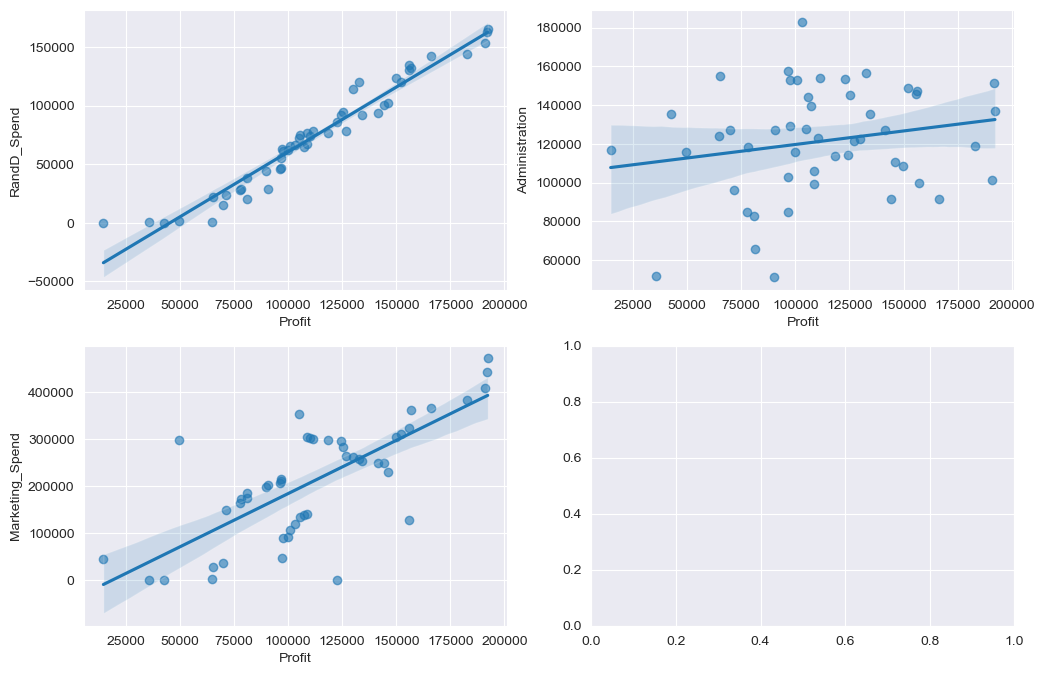

In [18]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sns.regplot(x = 'Profit', y = 'RandD_Spend', data = df, scatter_kws={'alpha':0.6}, ax = axes[0,0])
sns.regplot(x = 'Profit', y = 'Administration', data = df, scatter_kws={'alpha':0.6}, ax = axes[0,1])
sns.regplot(x = 'Profit', y = 'Marketing_Spend', data = df, scatter_kws={'alpha':0.6}, ax = axes[1,0])


In [19]:
X = df.drop(['Profit'], axis = 1).values        
y = df.iloc[:, 3].values.reshape(-1,1)
X

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [20]:
y

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

## Model Building
### Model 1 - Regression

In [21]:
model = linear_model.LinearRegression() 
model.fit(X,y)

LinearRegression()

In [22]:
r2_score(y,model.predict(X))


0.9507459940683246

### R2 0.9507459940683246

## Using stats.ols

In [23]:
module = smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend",data = df).fit()
module.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        17:44:05   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD_Spend         0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### r2 0.951

## Test for Normality of Residuals (Q-Q Plot)


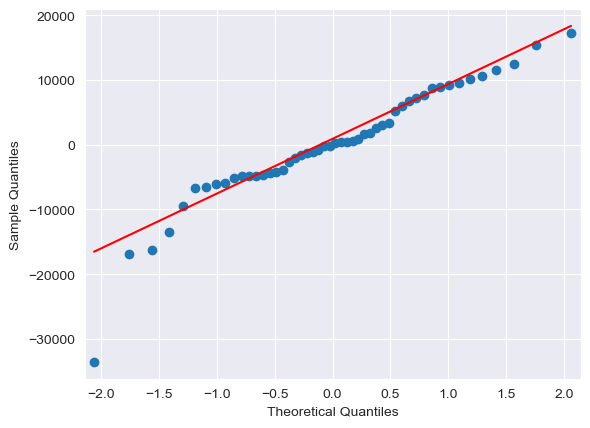

In [24]:
import statsmodels.api as sm
qqplot=sm.qqplot(module.resid,line='q')

## Residual Plot for Homoscedasticity


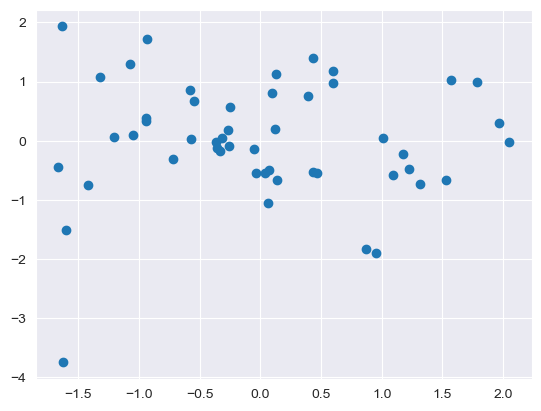

In [25]:
def std( vals ):                      
    return (vals - vals.mean())/vals.std()

plt.scatter(std(module.fittedvalues),
            std(module.resid))

## Residual Vs Regressors

eval_env: 1


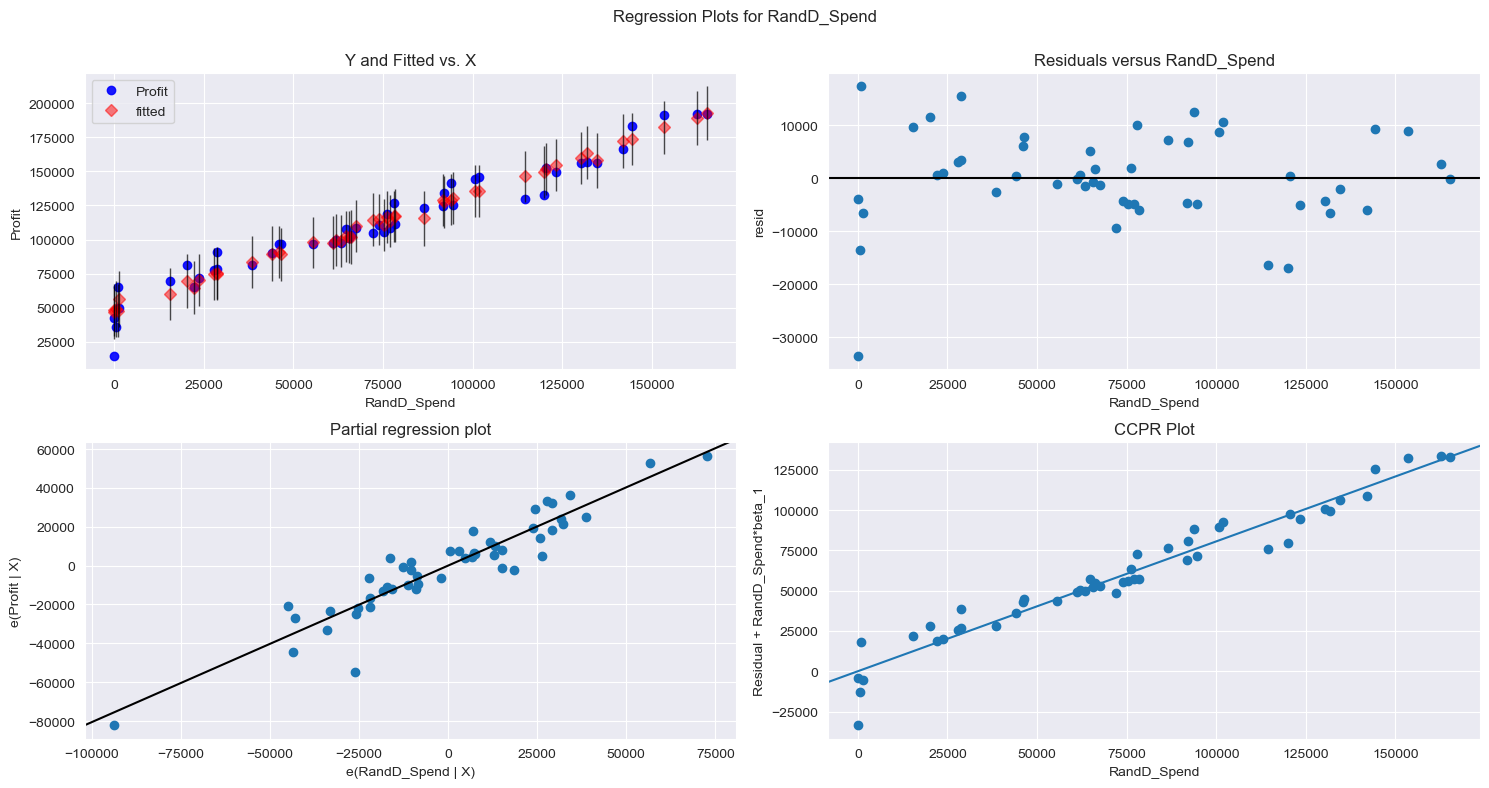

In [56]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(module, "RandD_Spend", fig=fig)
plt.show()


eval_env: 1


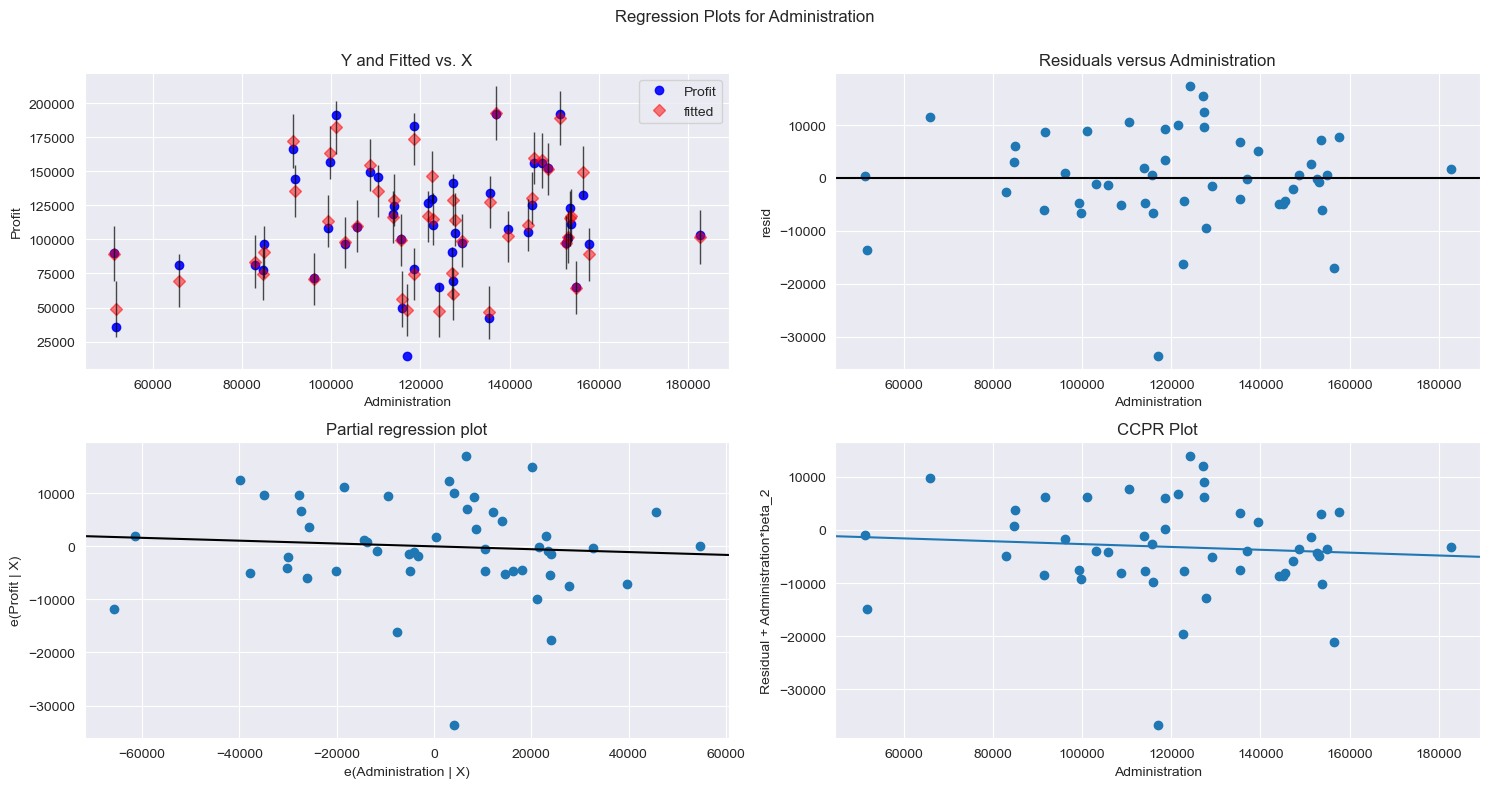

In [57]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(module, "Administration", fig=fig)
plt.show()


eval_env: 1


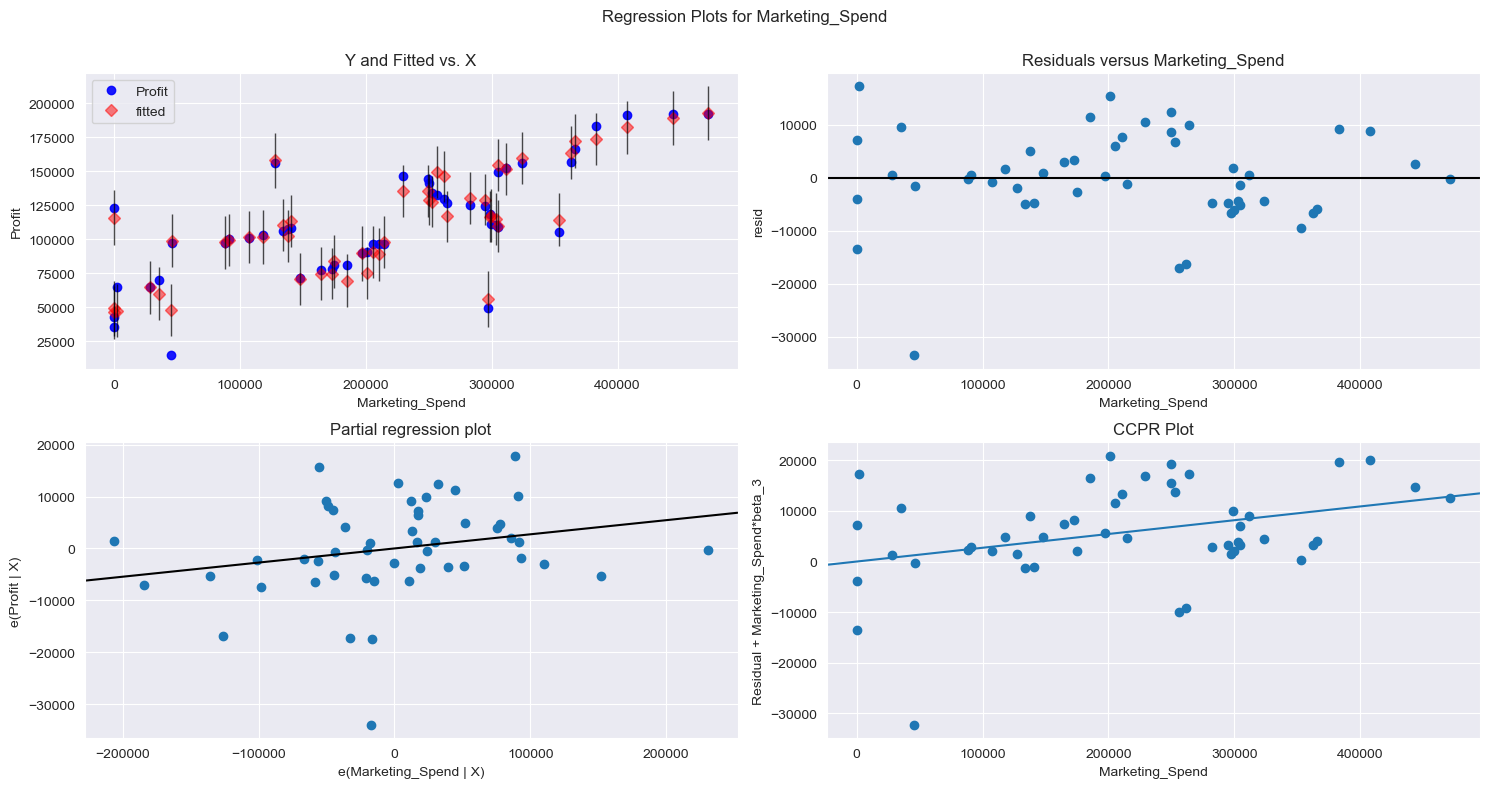

In [58]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(module, "Marketing_Spend", fig=fig)
plt.show()

## Deletion Diagnostics

### Detecting influencers/Outliers for module
using cook's distance

In [29]:
module_influence = module.get_influence()
(c, _) = module_influence.cooks_distance

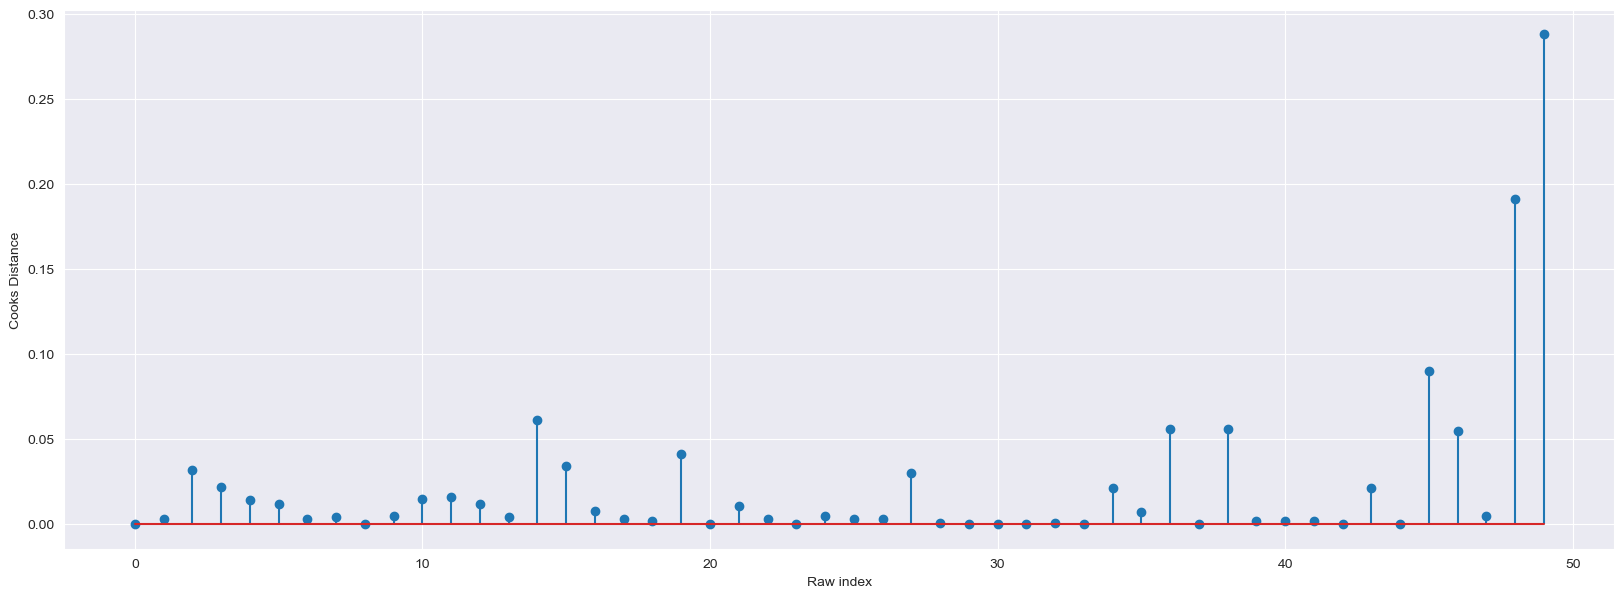

In [30]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()

In [31]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543264)

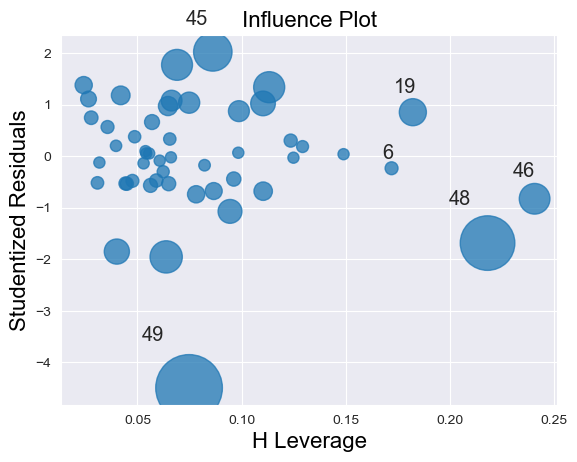

In [32]:
influence_plot(module)
plt.show()

Since the value is <1 , we doesn't need to do the diagnostic process and finalize the model

In [33]:
(module.rsquared,module.aic)


(0.9507459940683246, 1058.7714985998055)

In [34]:
module.params

Intercept          50122.192990
RandD_Spend            0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

# Model 2

## Sq Root Transfomration of X

In [35]:
X_sqrt = np.sqrt(df[['RandD_Spend', 'Marketing_Spend', "Administration"]])

In [36]:
model2 = sm.OLS(y, X_sqrt).fit()
predictions2 = model2.predict(X_sqrt)

In [37]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              1411.
Date:                Mon, 25 Sep 2023   Prob (F-statistic):                    5.02e-46
Time:                        17:44:06   Log-Likelihood:                         -542.47
No. Observations:                  50   AIC:                                      1091.
Df Residuals:                      47   BIC:                                      1097.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
RandD_Spend       338.6097     24.959     13.567      0.000     288.399     388.821
Marketing_Spend    23.2003     14.072      1.649      0.106      -5.109      51.509
Administration     49.0780     14.740      3.330      0.002      19.425      78.731
==============================================================================
Omnibus:                        6.476   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.008
Skew:                           0.847   Prob(JB):                       0.0496
Kurtosis:                       3.108   Cond. No.                         9.46
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Test for Normality of Residuals (Q-Q Plot)


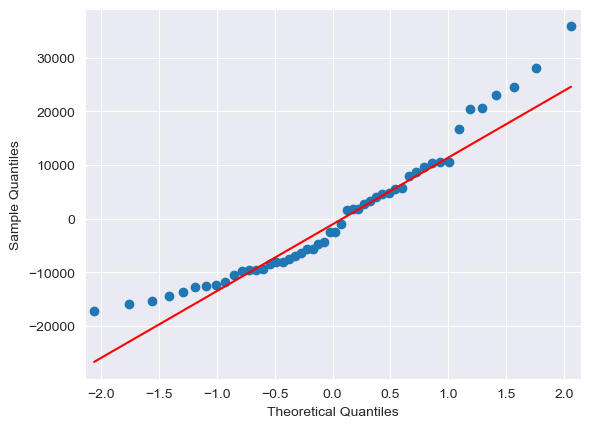

In [38]:
import statsmodels.api as sm
qqplot=sm.qqplot(model2.resid,line='q')

#### Residual Plot for Homoscedasticity


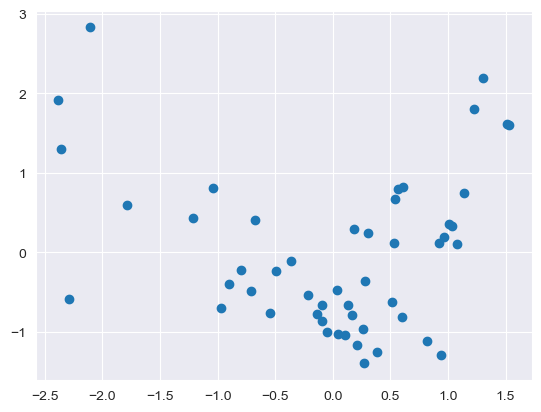

In [39]:
def std( vals ):                      
    return (vals - vals.mean())/vals.std()

plt.scatter(std(model2.fittedvalues),
            std(model2.resid))

#### Residual Vs Regressors


eval_env: 1


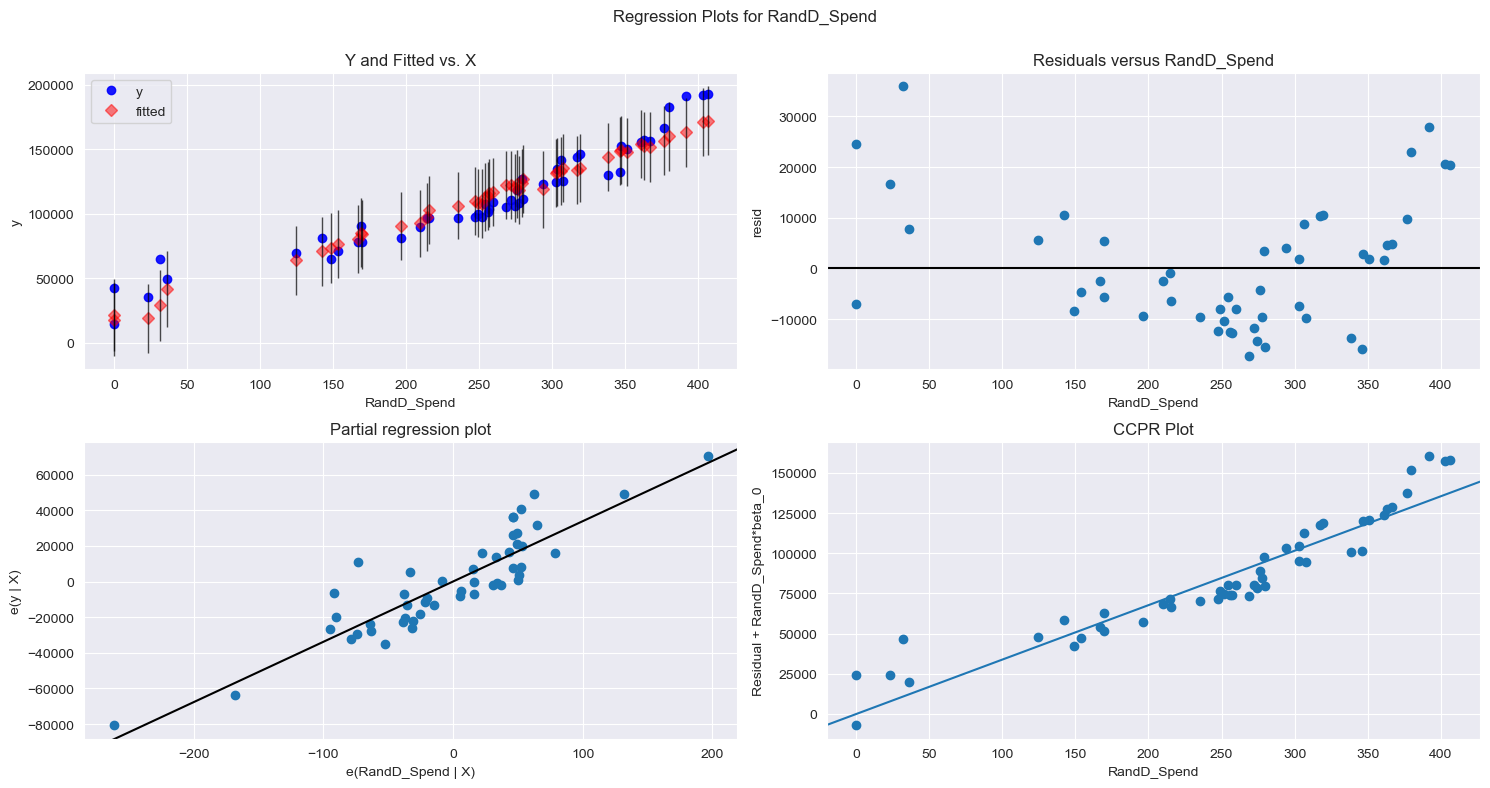

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "RandD_Spend", fig=fig)
plt.show()

eval_env: 1


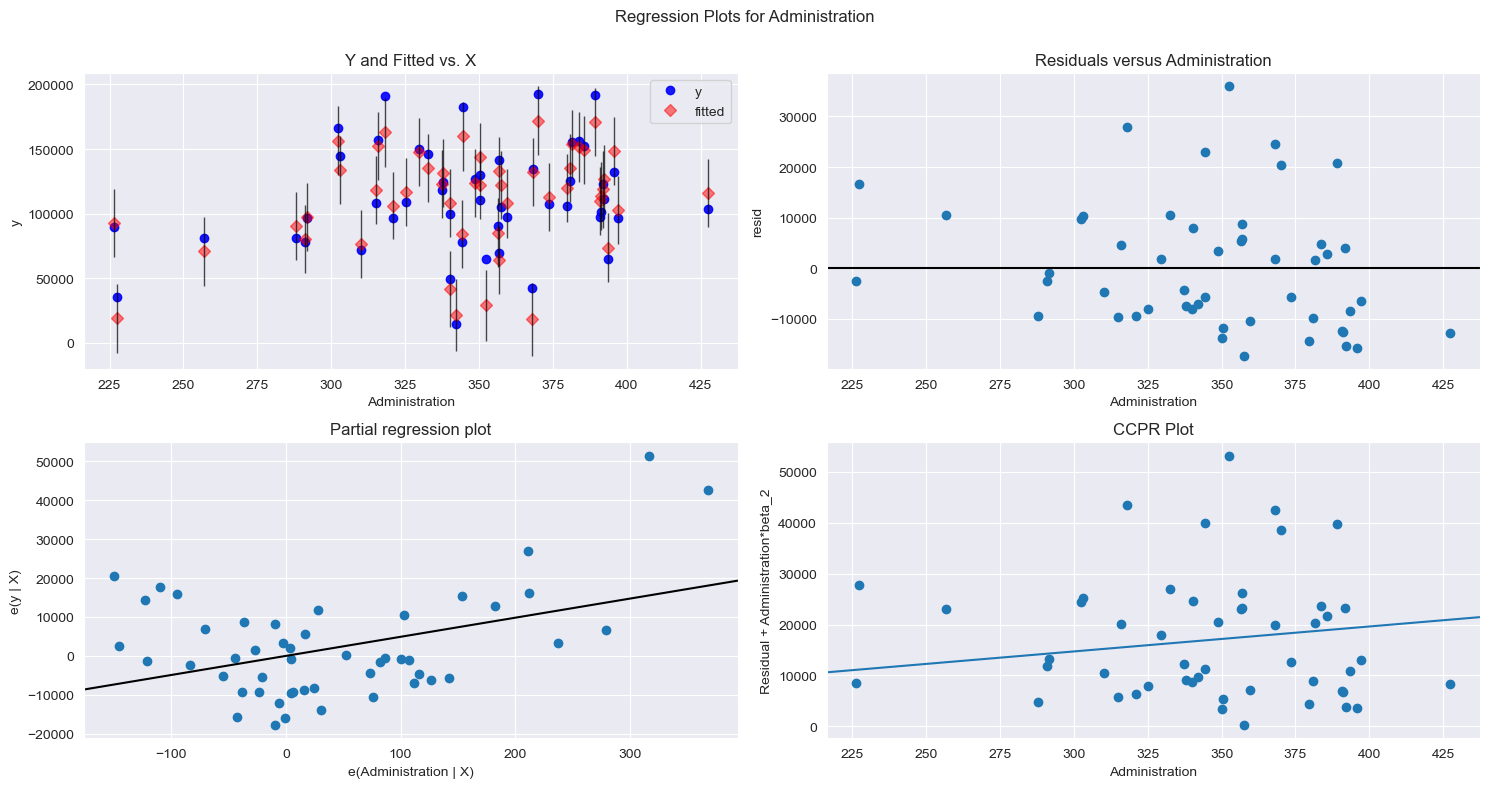

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "Administration", fig=fig)
plt.show()

eval_env: 1


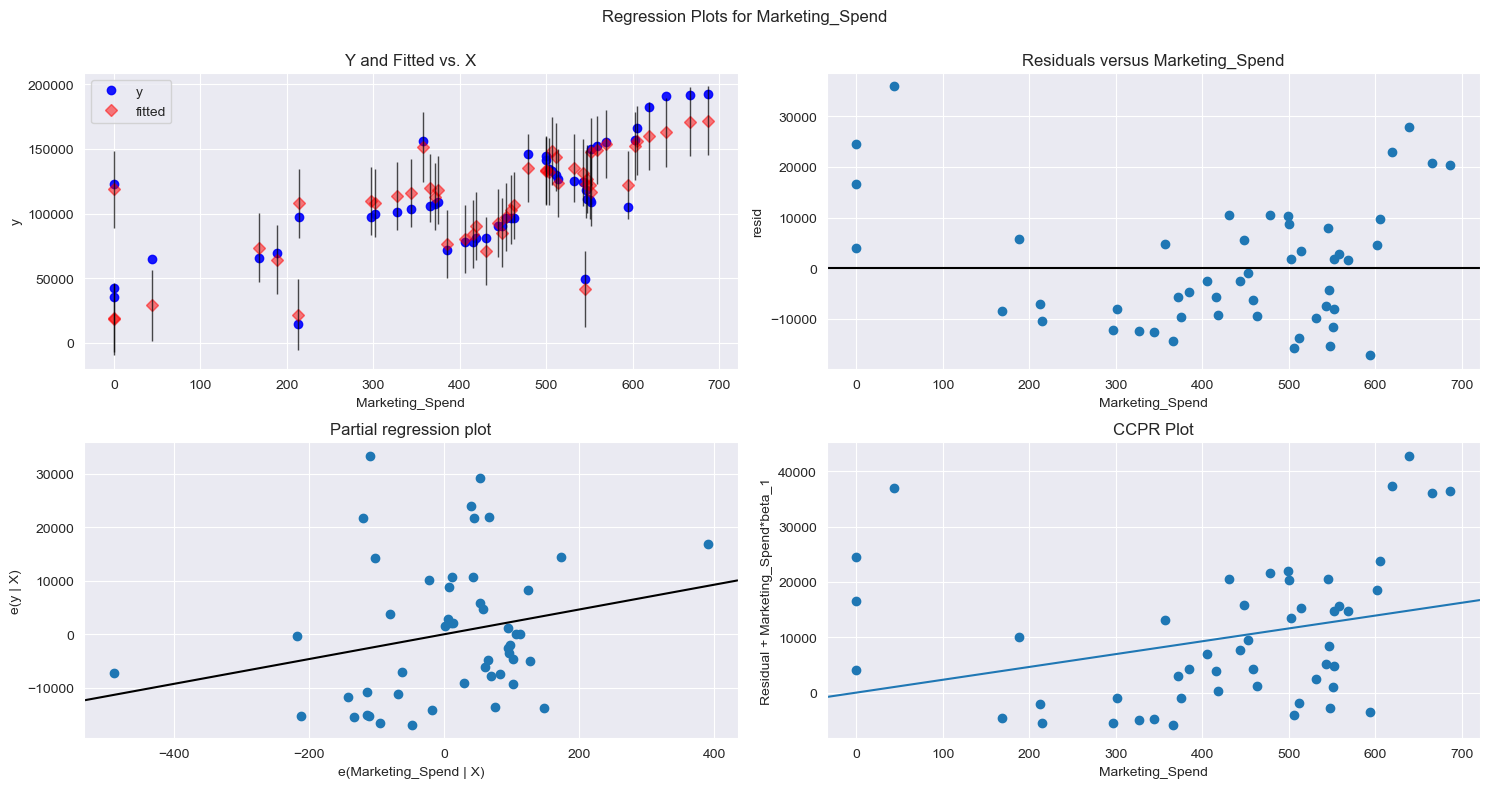

In [61]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "Marketing_Spend", fig=fig)
plt.show()

### Model Deletion Diagnostics
#### Detecting Influencers/Outliers


In [43]:
model2_influence = model2.get_influence()
(c1, _) = model2_influence.cooks_distance

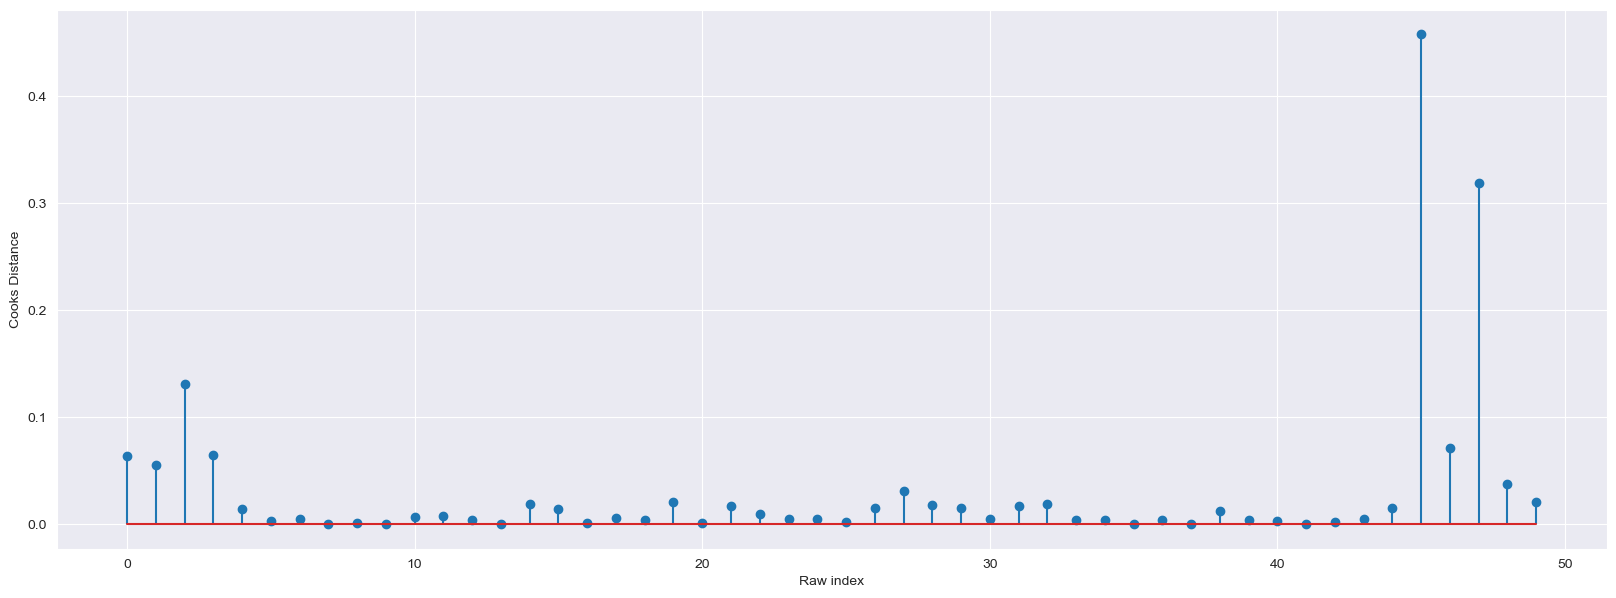

In [44]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c1, 3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()


In [45]:
(np.argmax(c1),np.max(c1))

(45, 0.45766139729829364)

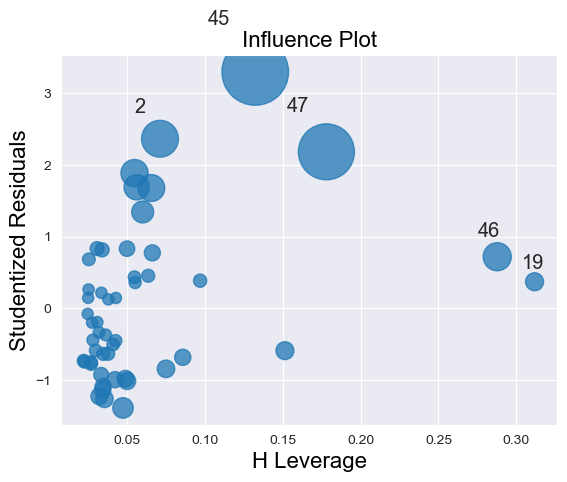

In [46]:
influence_plot(model2)
plt.show()


Since the value is <1 , we doesn't need to do the diagnostic process and finalize the model

# Model 3

## Sq Root Transfomration of X

In [77]:
X = df.drop(['Profit'], axis = 1).values        

y_sqrt = np.sqrt(df['Profit'])


In [78]:
model3 = sm.OLS(y_sqrt, X).fit()
predictions3 = model3.predict(X)

In [79]:
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              696.9
Date:                Mon, 25 Sep 2023   Prob (F-statistic):                    6.05e-39
Time:                        18:02:43   Log-Likelihood:                         -266.17
No. Observations:                  50   AIC:                                      538.3
Df Residuals:                      47   BIC:                                      544.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0009      0.000      3.528      0.001       0.000       0.001
x2             0.0016      0.000     13.765      0.000       0.001       0.002
x3             0.0003    8.2e-05      3.563      0.001       0.000       0.000
==============================================================================
Omnibus:                        0.635   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.728   Jarque-Bera (JB):                0.750
Skew:                           0.168   Prob(JB):                        0.687
Kurtosis:                       2.503   Cond. No.                         9.76
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Test for Normality of Residuals (Q-Q Plot)


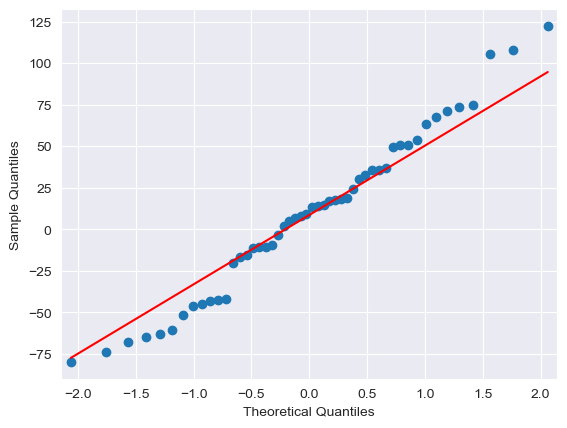

In [80]:
import statsmodels.api as sm
qqplot=sm.qqplot(model3.resid,line='q')

### Residual Plot for Homoscedasticity


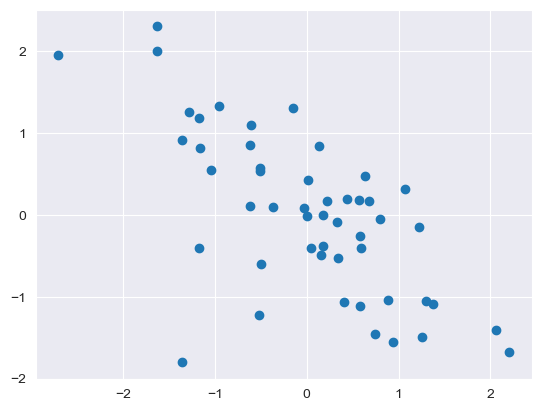

In [81]:
def std( vals ):                      
    return (vals - vals.mean())/vals.std()

plt.scatter(std(model3.fittedvalues),
            std(model3.resid))

In [82]:
print(model3)


#### Model Deletion Diagnostics



##### Detecting Influencers/Outliers


In [83]:
model3_influence = module.get_influence()
(c2, _) = model3_influence.cooks_distance

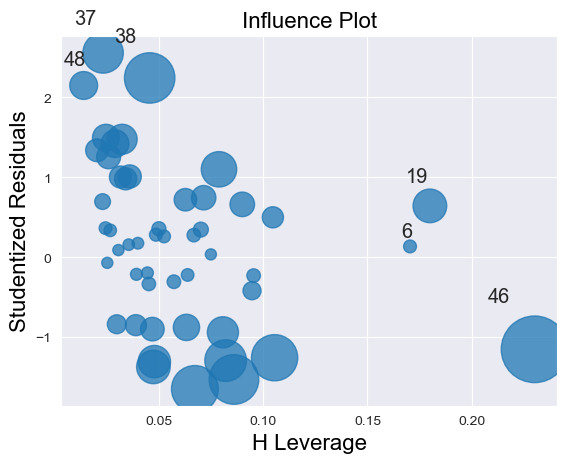

In [84]:
influence_plot(model3)
plt.show()


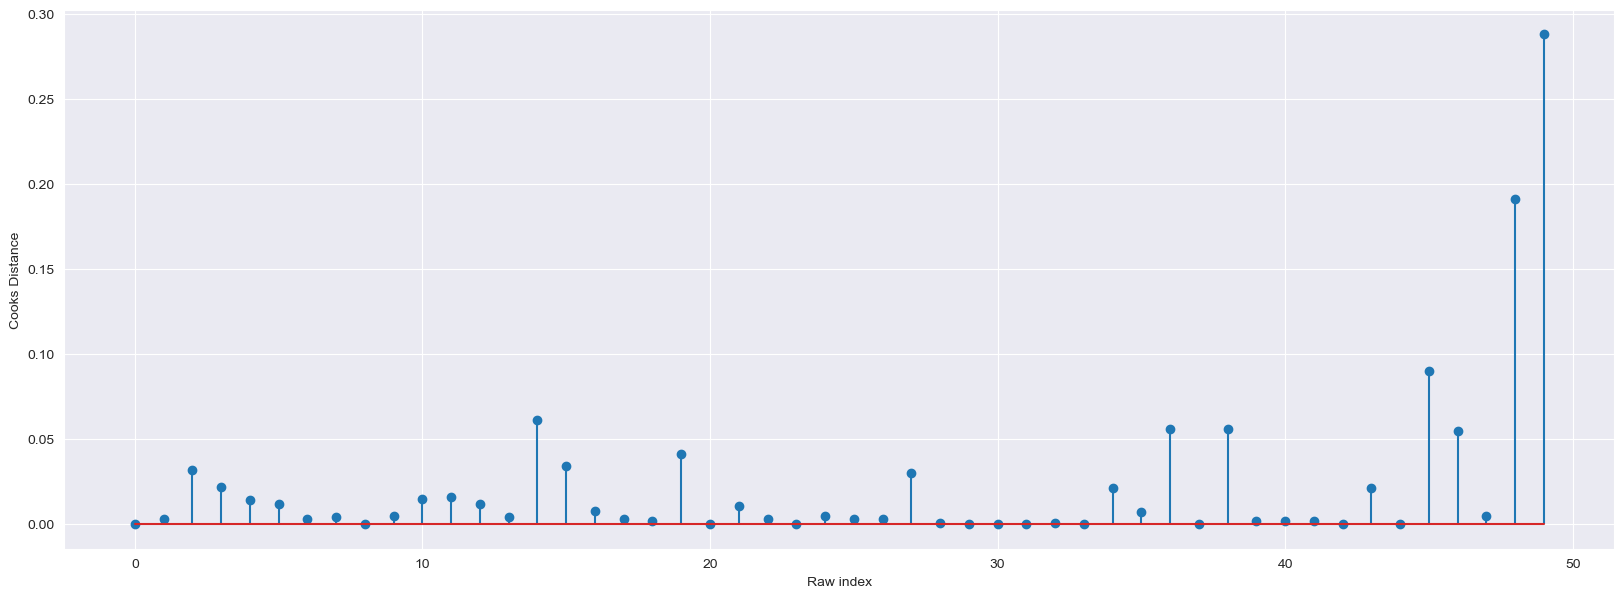

In [85]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c2, 3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()

In [86]:
(np.argmax(c2),np.max(c2))


(49, 0.2880822927543264)

Since the value is <1 , we can stop the diagnostic process and finalize the model

# Model 4

## Sq Root Transfomration of X and Y

In [88]:
model4 = sm.OLS(y_sqrt, X_sqrt).fit()
predictions4 = model4.predict(X_sqrt)

In [89]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              2396.
Date:                Mon, 25 Sep 2023   Prob (F-statistic):                    2.20e-51
Time:                        18:03:08   Log-Likelihood:                         -235.70
No. Observations:                  50   AIC:                                      477.4
Df Residuals:                      47   BIC:                                      483.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
RandD_Spend         0.5012      0.054      9.277      0.000       0.393       0.610
Marketing_Spend     0.0822      0.030      2.699      0.010       0.021       0.143
Administration      0.4787      0.032     15.001      0.000       0.414       0.543
==============================================================================
Omnibus:                        1.516   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                0.926
Skew:                           0.322   Prob(JB):                        0.629
Kurtosis:                       3.174   Cond. No.                         9.46
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Test for Normality of Residuals (Q-Q Plot)


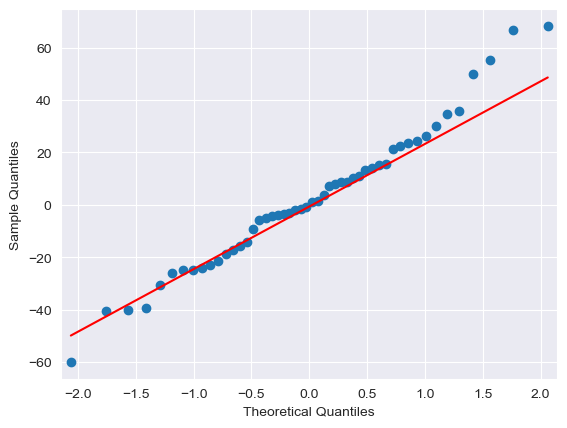

In [90]:
import statsmodels.api as sm
qqplot=sm.qqplot(model4.resid,line='q')

### Residual Plot for Homoscedasticity


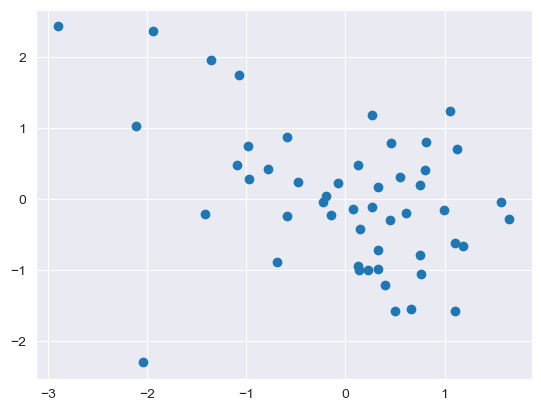

In [91]:
def std( vals ):                      
    return (vals - vals.mean())/vals.std()

plt.scatter(std(model4.fittedvalues),
            std(model4.resid))

### Residual Vs Regressors


eval_env: 1


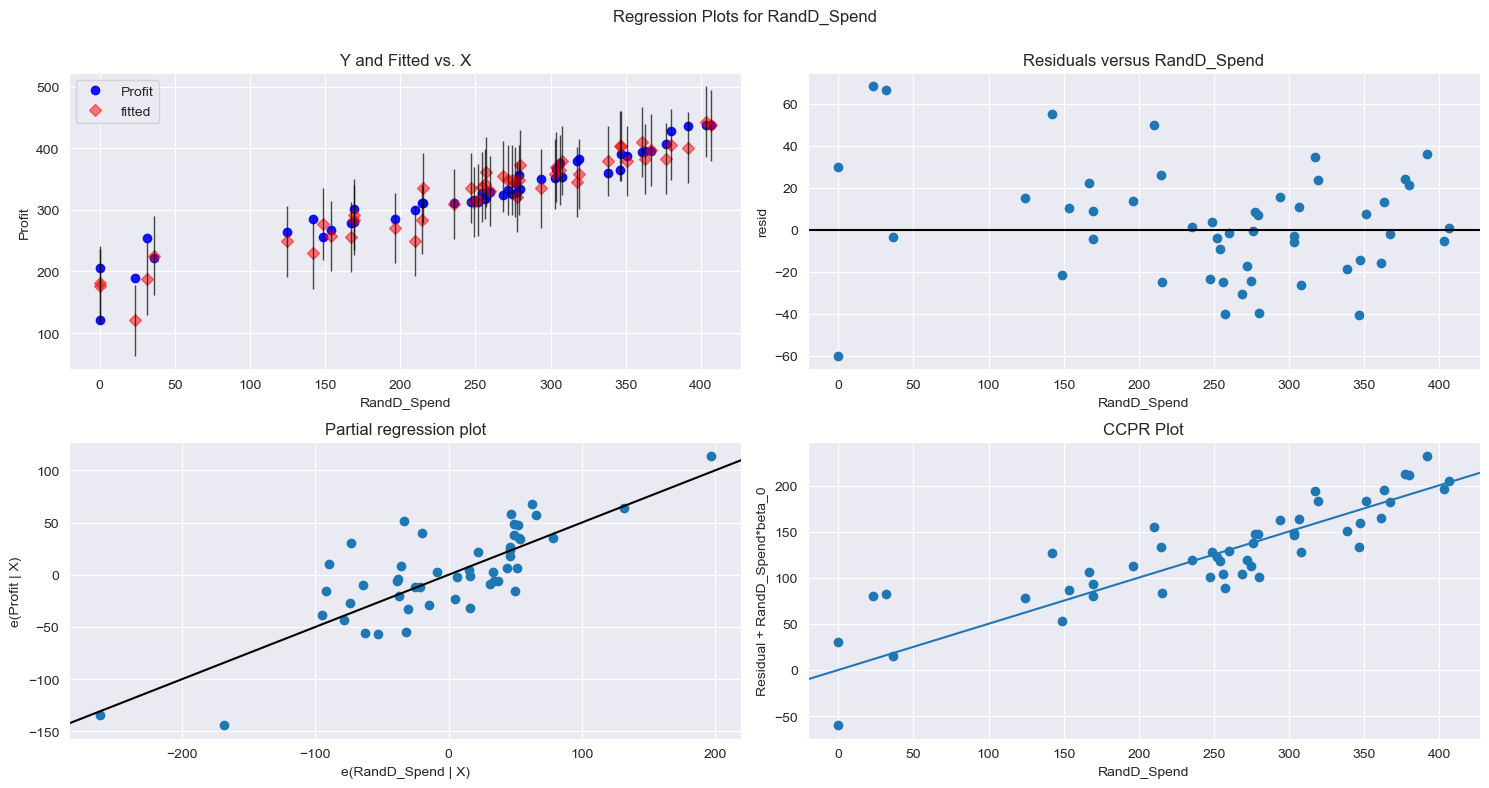

In [92]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "RandD_Spend", fig=fig)
plt.show()


eval_env: 1


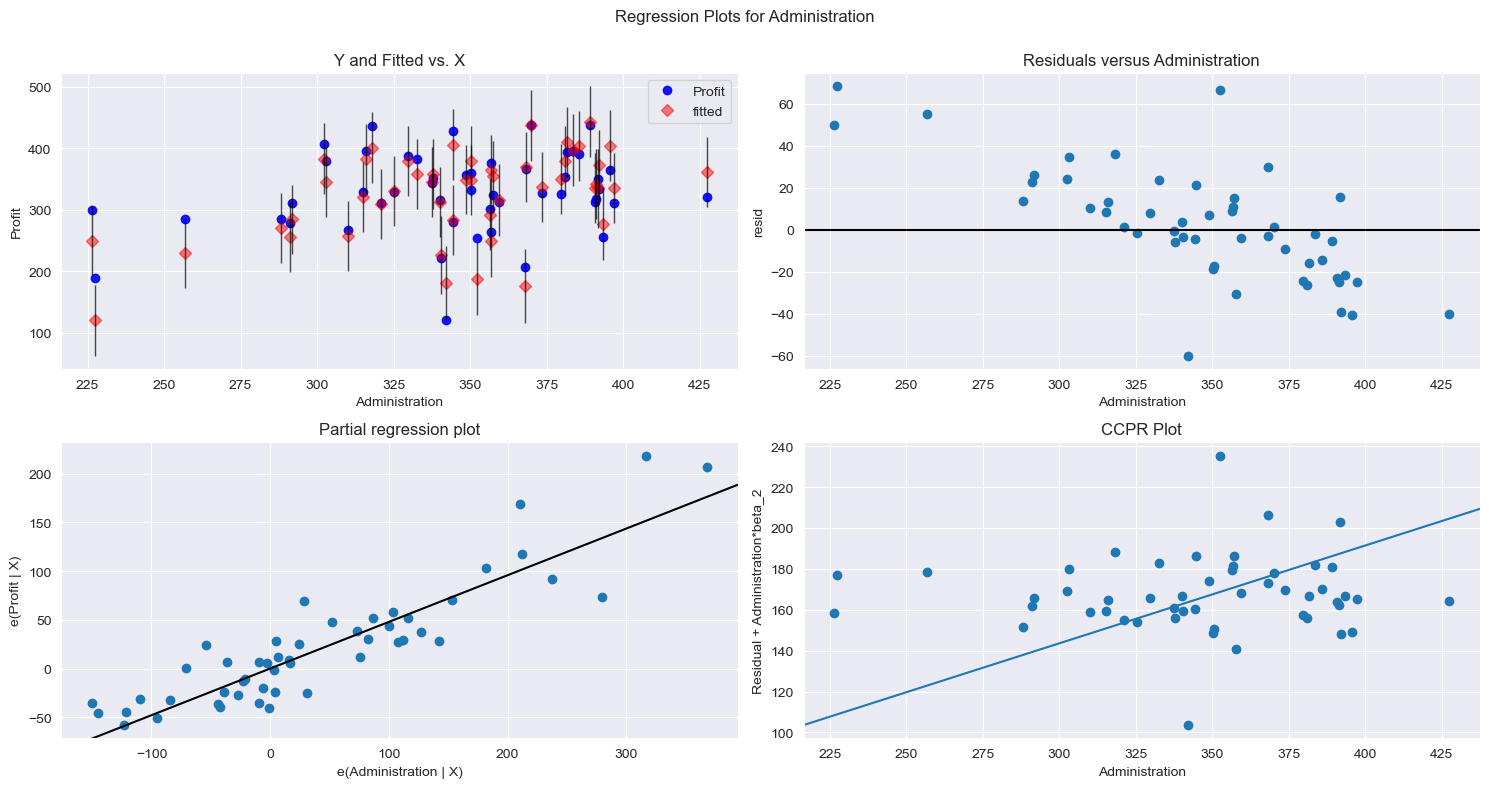

In [93]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "Administration", fig=fig)
plt.show()

eval_env: 1


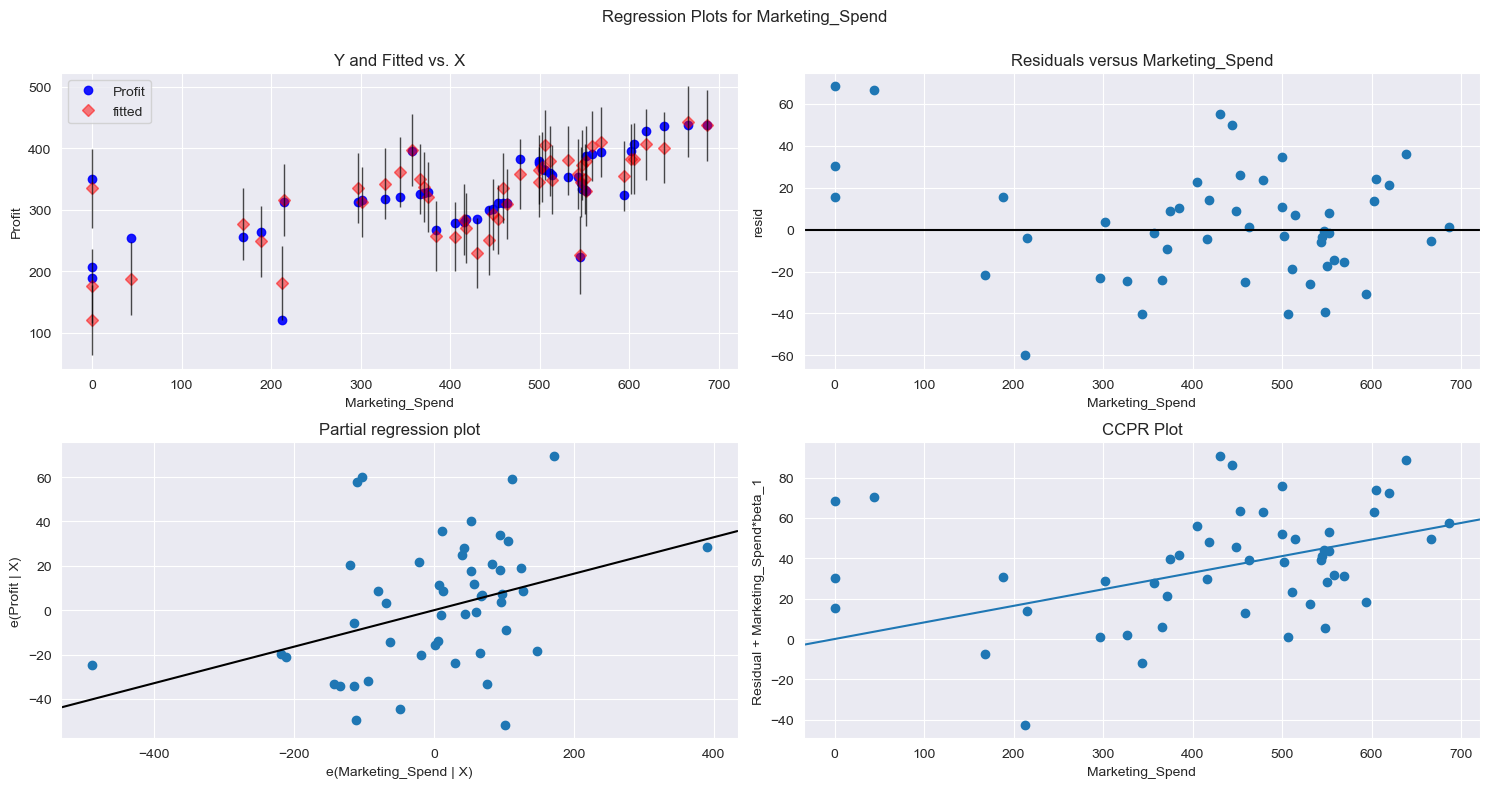

In [94]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "Marketing_Spend", fig=fig)
plt.show()


### Model Deletion Diagnostics

#### Detecting Influencers/Outliers
using cook's distance method


In [96]:
model4_influence = module.get_influence()
(c3, _) = model4_influence.cooks_distance

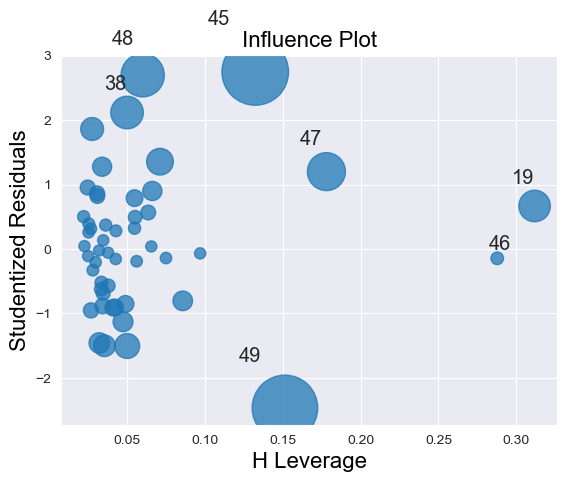

In [97]:
influence_plot(model4)
plt.show()


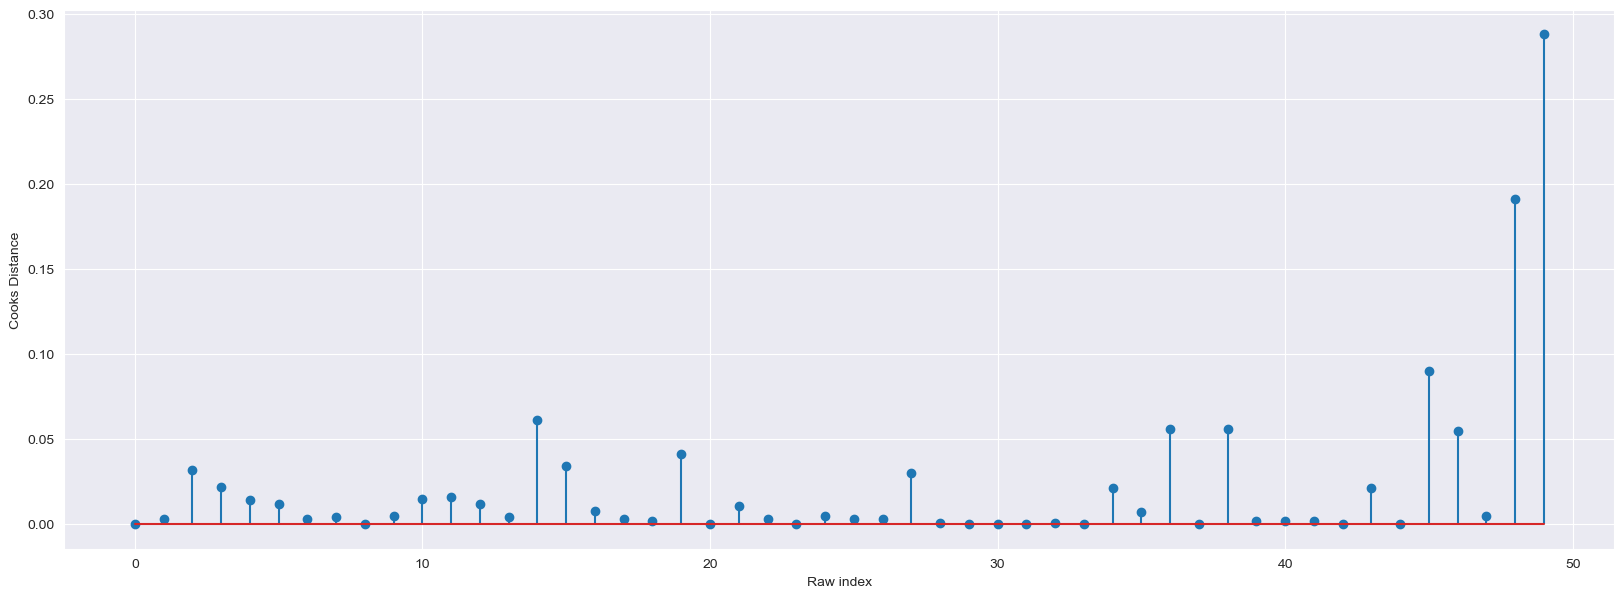

In [99]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c3, 3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()

In [100]:
(np.argmax(c2),np.max(c2))


(49, 0.2880822927543264)

Since the value is <1 , we can stop the diagnostic process and finalize the model

#### As improving of the model and removing outliers wasnt required in any of the four model created. So we have final 4 base models and a R2 table is presented below.

In [101]:
model_names = ["Model 1 - Regression", "Model 2 - Sq_Root X", "Model 3 - Sq_Root Y", "Model 4 - Sq_Root of X and Y"]
r_squared_values = [0.987, 0.989, 0.978, 0.994]

In [102]:
data = {"Model Name": model_names, "R-squared": r_squared_values}
df_t = pd.DataFrame(data)

In [103]:
df_t

,Model Name,R-squared
0,Model 1 - Regression,0.987
1,Model 2 - Sq_Root X,0.989
2,Model 3 - Sq_Root Y,0.978
3,Model 4 - Sq_Root of X and Y,0.994


#### As from the above table Model 4 cover good proportion to varience and as its close to 1, its excellent fit 